# Manufacturer Safety Profile Comparison

**Purpose**: Compare adverse event profiles across manufacturers  
**Data**: 2020-2023 (4 years), device + master  
**Research Question**: How do safety profiles differ across manufacturers?

## What You'll Learn

- Compare event counts by manufacturer
- Analyze event type distributions
- Temporal patterns by manufacturer
- Statistical considerations for comparisons

In [1]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent / 'src'))

from pymaude import MaudeDatabase
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
db = MaudeDatabase('getting_started.db', verbose=True)

db.add_years(
    years='2020-2023',
    tables=['device', 'master'],
    download=True,
    data_dir='./maude_data'
)


Grouping years by file for optimization...

  Using cached device2020.zip
  Using cached device2021.zip
  Using cached device2022.zip
  Using cached device2023.zip
  Using cached mdrfoithru2025.zip

Processing data files...

device for year 2020 already loaded and unchanged, skipping

device for year 2021 already loaded and unchanged, skipping

device for year 2022 already loaded and unchanged, skipping

device for year 2023 already loaded and unchanged, skipping

master for years 2020-2023 already loaded and unchanged, skipping

Creating indexes...

Database update complete


## 1. Query Device Category

Let's analyze pacemakers across manufacturers.

In [3]:
# Query all pacemaker events
results = db.query_device(device_name='pacemaker')
print(f"Total pacemaker events: {len(results):,}")

# Show sample
results[['MDR_REPORT_KEY', 'GENERIC_NAME', 'MANUFACTURER_D_NAME', 'EVENT_TYPE']].head()

Total pacemaker events: 234,030


,MDR_REPORT_KEY,MDR_REPORT_KEY,GENERIC_NAME,MANUFACTURER_D_NAME,EVENT_TYPE
0,9537117,9537117,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",M
1,9537119,9537119,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
2,9537127,9537127,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
3,9537129,9537129,PERMANENT PACEMAKER ELECTRODE,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN
4,9537130,9537130,IMPLANTABLE PACEMAKER PULSE GENERATOR,"ST. JUDE MEDICAL, INC.(CRM-SUNNYVALE)",IN


## 2. Top Manufacturers by Event Count

                         manufacturer  event_count
0                                MPRI        71177
1  ST. JUDE MEDICAL, INC.(CRM-SYLMAR)        47980
2       BOSTON SCIENTIFIC CORPORATION        36705
3            ZOLL MEDICAL CORPORATION        13437
4                     MEDTRONIC, INC.        12359
5                              ABBOTT        11014
6      MEDTRONIC SINGAPORE OPERATIONS        10940
7                           MEDTRONIC         6193
8                   MEDTRONIC IRELAND         6177
9                    ST. JUDE MEDICAL         3713


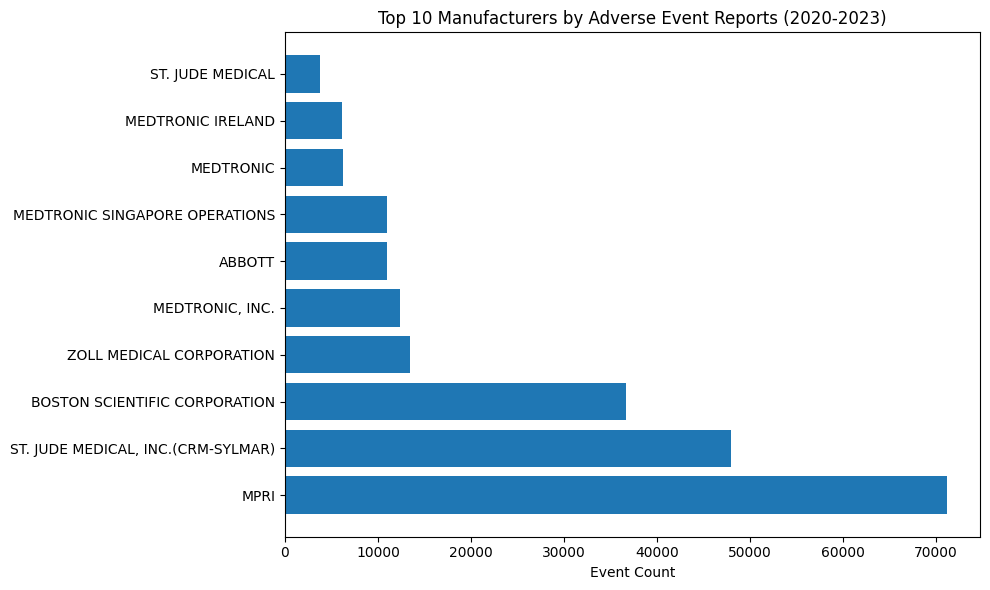

In [4]:
# Get top 10 manufacturers
top_mfg = db.top_manufacturers_for(results, n=10)
print(top_mfg)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(top_mfg['manufacturer'], top_mfg['event_count'])
plt.xlabel('Event Count')
plt.title('Top 10 Manufacturers by Adverse Event Reports (2020-2023)')
plt.tight_layout()
plt.show()

## 3. Event Type Breakdown by Manufacturer

Compare deaths, injuries, and malfunctions across top manufacturers.

In [5]:
# Get event type breakdown for each manufacturer
top_5_mfg = top_mfg.head(5)['manufacturer'].tolist()

comparison_data = []
for mfg in top_5_mfg:
    mfg_events = results[results['MANUFACTURER_D_NAME'] == mfg]
    breakdown = db.event_type_breakdown_for(mfg_events)
    comparison_data.append({
        'Manufacturer': mfg,
        'Total': breakdown['total'],
        'Deaths': breakdown['deaths'],
        'Injuries': breakdown['injuries'],
        'Malfunctions': breakdown['malfunctions']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

                         Manufacturer  Total  Deaths  Injuries  Malfunctions
0                                MPRI  71177     825     34878         35474
1  ST. JUDE MEDICAL, INC.(CRM-SYLMAR)  47980     778     27867         19335
2       BOSTON SCIENTIFIC CORPORATION  36705     205     26497         10001
3            ZOLL MEDICAL CORPORATION  13437     200        62         13175
4                     MEDTRONIC, INC.  12359     146      1871         10330


## 4. Statistical Considerations

**Important**: Higher event counts may reflect:
- Larger market share (more devices in use)
- Better reporting practices
- Longer time on market
- Different device types/indications

**For fair comparison, normalize by:**
- Market share (devices sold)
- Device-years of exposure
- Device risk class

In [6]:
db.close()
print("\n✓ Analysis complete!")
print("See notebook 05 for signal detection techniques.")


✓ Analysis complete!
See notebook 05 for signal detection techniques.
